In [22]:
#Import library pandas
import pandas as pd

file_paths = ["merged_dataset_2023.csv", "merged_dataset_2024.csv"]

dataframes = [pd.read_csv(file) for file in file_paths]

merged_data = pd.concat(dataframes, ignore_index=True)

merged_data.head()


,VIN,ZIPCODE,ODOMETER,TEST DATE,MAKE,MODEL,Unnamed: 6,MY,PURCHASE DATE
0,1N4AL21EX9N445210,604512772.0,165000.0,1/3/2023,NISS,Altima,NaN,2009.0,12/11/2008
1,1J4GW48S84C351215,604061911.0,188000.0,1/3/2023,JEEP,Grand Cherokee,NaN,2004.0,1/27/2023
2,KM8JUCAG4FU977886,601483865.0,71000.0,1/3/2023,HYUN,Tucson,NaN,2015.0,3/9/2024
3,3C4PDCBG8DT503282,606183412.0,50000.0,1/3/2023,DODG,Journey,NaN,2013.0,3/11/2013
4,3N1CN7APXCL836122,606258937.0,270000.0,1/3/2023,NISS,Versa,NaN,2012.0,9/1/2018


In [23]:
merged_data.columns = merged_data.columns.str.lower()

In [24]:
merged_data.head()

,vin,zipcode,odometer,test date,make,model,unnamed: 6,my,purchase date
0,1N4AL21EX9N445210,604512772.0,165000.0,1/3/2023,NISS,Altima,NaN,2009.0,12/11/2008
1,1J4GW48S84C351215,604061911.0,188000.0,1/3/2023,JEEP,Grand Cherokee,NaN,2004.0,1/27/2023
2,KM8JUCAG4FU977886,601483865.0,71000.0,1/3/2023,HYUN,Tucson,NaN,2015.0,3/9/2024
3,3C4PDCBG8DT503282,606183412.0,50000.0,1/3/2023,DODG,Journey,NaN,2013.0,3/11/2013
4,3N1CN7APXCL836122,606258937.0,270000.0,1/3/2023,NISS,Versa,NaN,2012.0,9/1/2018


In [25]:
merged_data.to_csv("merged_dataset.csv", index=False)

In [27]:
odometer_data = pd.read_csv("merged_dataset.csv")

In [28]:
odometer_data.columns


Index(['vin', 'zipcode', 'odometer', 'test date', 'make', 'model',
       'unnamed: 6', 'my', 'purchase date'],
      dtype='object')

In [30]:
# Drop the 'unnamed: 6' column if it exists
odometer_data = odometer_data.drop(columns=["unnamed: 6"], errors="ignore")
# Convert 'test date' and 'purchase date' to datetime format
odometer_data["test date"] = pd.to_datetime(odometer_data["test date"], errors="coerce")
odometer_data["purchase date"] = pd.to_datetime(odometer_data["purchase date"], errors="coerce")


In [31]:
# Check the data types to confirm the change
odometer_data.dtypes

vin                      object
zipcode                 float64
odometer                float64
test date        datetime64[ns]
make                     object
model                    object
my                      float64
purchase date    datetime64[ns]
dtype: object

In [35]:
# Drop rows where all values are missing
odometer_data = odometer_data.dropna(how="all")

# Impute missing values for 'zipcode' with 0
odometer_data["zipcode"].fillna(0, inplace=True)

# Impute missing values for 'model' with "Unknown"
odometer_data["model"].fillna("Unknown", inplace=True)
odometer_data["make"].fillna("Unknown", inplace=True)
odometer_data = odometer_data[odometer_data["purchase date"].notna()]


# Check for remaining missing values
odometer_data.isnull().sum()


vin              0
zipcode          0
odometer         0
test date        0
make             0
model            0
my               0
purchase date    0
dtype: int64

## EDA

In [39]:
# Summary statistics for numerical columns
odometer_data.describe()

,zipcode,odometer,test date,my,purchase date
count,4.140611e+06,4.140611e+06,4140611,4.140611e+06,4140611
mean,6.046499e+08,1.014798e+05,2023-11-06 04:10:50.349234432,2.012538e+03,2018-03-22 20:36:11.050022912
min,6.018100e+04,0.000000e+00,2023-01-03 00:00:00,1.996000e+03,1900-01-01 00:00:00
25%,6.012079e+08,5.500000e+04,2023-06-02 00:00:00,2.009000e+03,2016-02-05 00:00:00
50%,6.045154e+08,9.300000e+04,2023-11-02 00:00:00,2.014000e+03,2019-05-23 00:00:00
75%,6.062300e+08,1.410000e+05,2024-04-11 00:00:00,2.017000e+03,2021-11-29 00:00:00
max,9.868646e+08,9.990000e+05,2024-08-31 00:00:00,2.024000e+03,2030-03-12 00:00:00
std,5.563251e+06,6.305206e+04,NaN,5.494010e+00,NaN


In [40]:
# Check for unique values in categorical columns
odometer_data[["vin", "make", "model"]].nunique()

vin      3620166
make         204
model       1222
dtype: int64

odometer:
The minimum value is 0, which could indicate errors or missing data. 
The mean odometer reading is 101,479, with a maximum value of 999,000, which might indicate outliers.

vin: #3,620,166 unique vins indicate that most rows represent unique vehicles. 
make: #204 unique vehicle manufacturers. 
model: #1,222 unique vehicle models, which seems reasonable.

## Data Distribution

In [45]:
import matplotlib.pyplot as plt

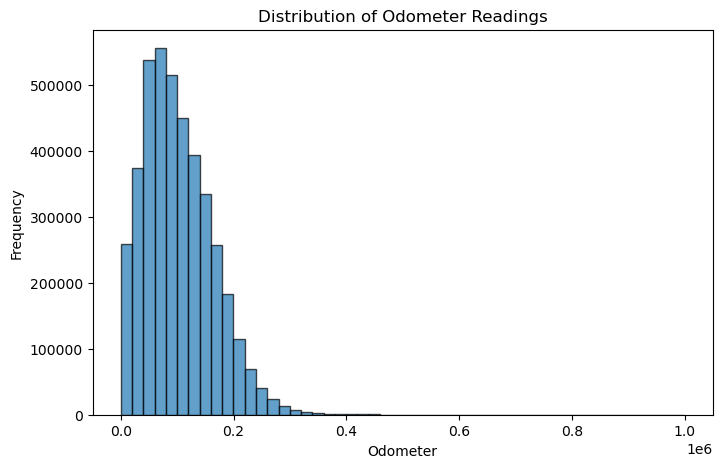

In [46]:
# Plot histogram for 'odometer'
plt.figure(figsize=(8, 5))
plt.hist(odometer_data["odometer"], bins=50, edgecolor="k", alpha=0.7)
plt.title("Distribution of Odometer Readings")
plt.xlabel("Odometer")
plt.ylabel("Frequency")
plt.show()

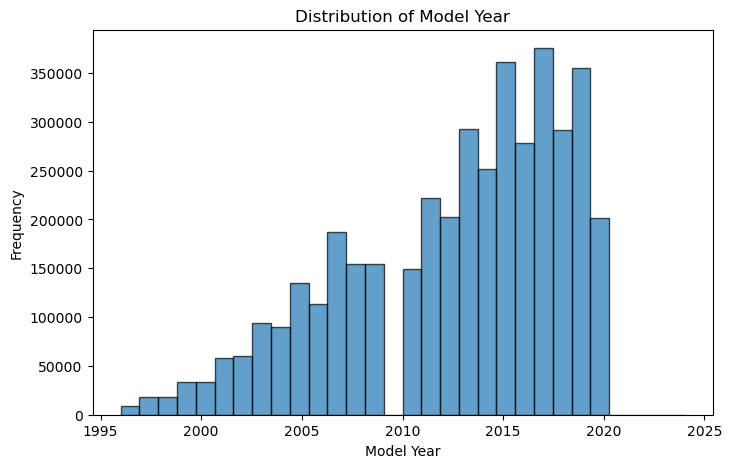

In [47]:
# Plot histogram for 'my' (Model Year)
plt.figure(figsize=(8, 5))
plt.hist(odometer_data["my"], bins=30, edgecolor="k", alpha=0.7)
plt.title("Distribution of Model Year")
plt.xlabel("Model Year")
plt.ylabel("Frequency")
plt.show()

### Analysis of Distributions:
Odometer Readings:
The distribution is skewed to the right, with most odometer readings below 200,000.
A small number of values are close to or above 800,000, indicating possible outliers.
Model Year:
The majority of vehicles are from 2005 to 2020, with a peak around 2015–2017.
A few vehicles have model years before 2000, which might be rare cases or potential errors.


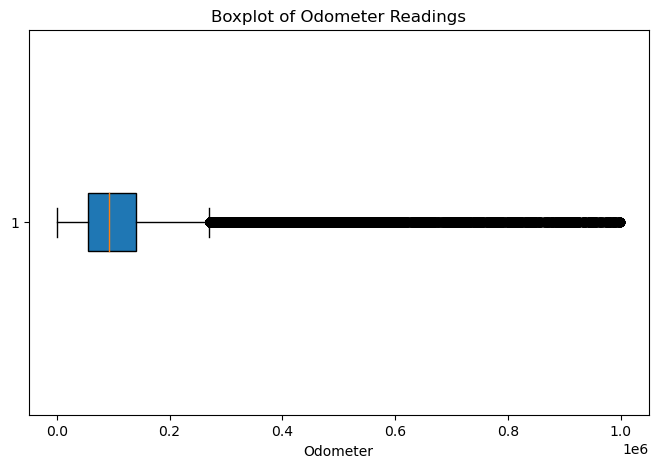

In [48]:
#Check for Outliers
# Boxplot for 'odometer'
plt.figure(figsize=(8, 5))
plt.boxplot(odometer_data["odometer"], vert=False, patch_artist=True)
plt.title("Boxplot of Odometer Readings")
plt.xlabel("Odometer")
plt.show()

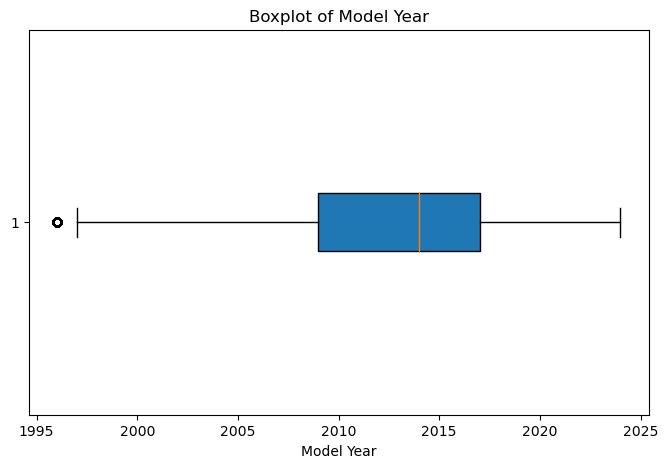

In [49]:
# Boxplot for 'my' (Model Year)
plt.figure(figsize=(8, 5))
plt.boxplot(odometer_data["my"], vert=False, patch_artist=True)
plt.title("Boxplot of Model Year")
plt.xlabel("Model Year")
plt.show()

## Analysis of Boxplots:
Odometer Readings:
There are numerous outliers beyond 300,000, with some close to 1,000,000. These could represent data entry errors, extreme cases, or anomalies that need further investigation.
Model Year:
A few outliers exist below 2000, which may represent older cars or incorrect entries.
The majority of vehicles fall between 2005 and 2020.

In [51]:
# Remove outliers in 'odometer' (values > 300,000)
odometer_threshold = 300000
odometer_data = odometer_data[odometer_data["odometer"] <= odometer_threshold]

# Remove outliers in 'my' (Model Year) (values < 2000)
model_year_threshold = 2000
odometer_data = odometer_data[odometer_data["my"] >= model_year_threshold]

# Check the shape of the cleaned dataset
odometer_data.shape


(4042304, 8)

## Exploratory Analysis

### Analyze Monthly Trends

In [52]:
# Add a column for month and year from 'test date'
odometer_data["test_month"] = odometer_data["test date"].dt.to_period("M")

# Group by month to calculate the number of records and average odometer readings
monthly_trends = odometer_data.groupby("test_month").agg(
    record_count=("vin", "count"),
    avg_odometer=("odometer", "mean")
).reset_index()

# Preview trends
monthly_trends.head()


,test_month,record_count,avg_odometer
0,2023-01,173248,97939.604948
1,2023-02,166494,96532.637182
2,2023-03,230892,96553.377986
3,2023-04,205431,96022.411043
4,2023-05,214380,96173.678767


The monthly trends show both the number of records and the average odometer readings per month. It seems that the record count and average odometer values are consistent, but we can visualize this data to better understand the trends.

### Visualize Monthly Trends

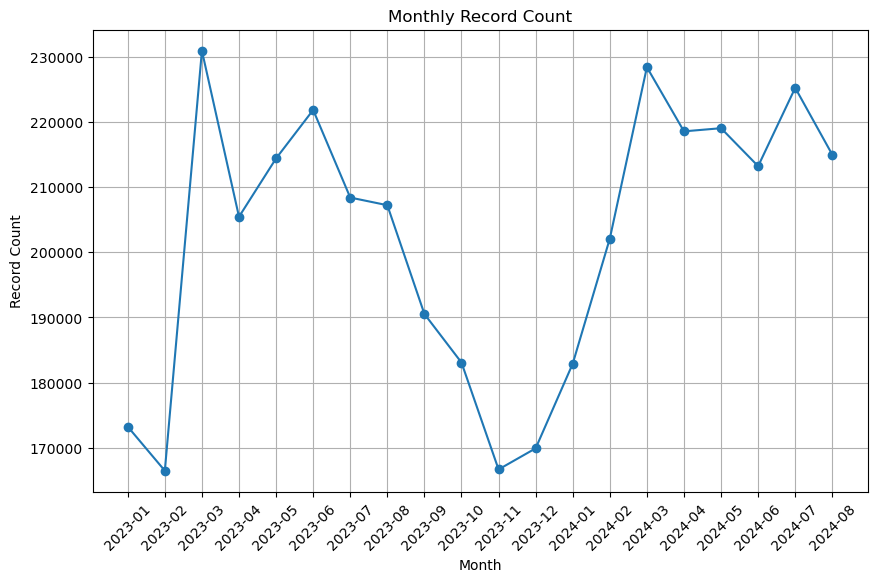

In [53]:
import matplotlib.pyplot as plt

# Plot record count over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends["test_month"].astype(str), monthly_trends["record_count"], marker="o")
plt.title("Monthly Record Count")
plt.xlabel("Month")
plt.ylabel("Record Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

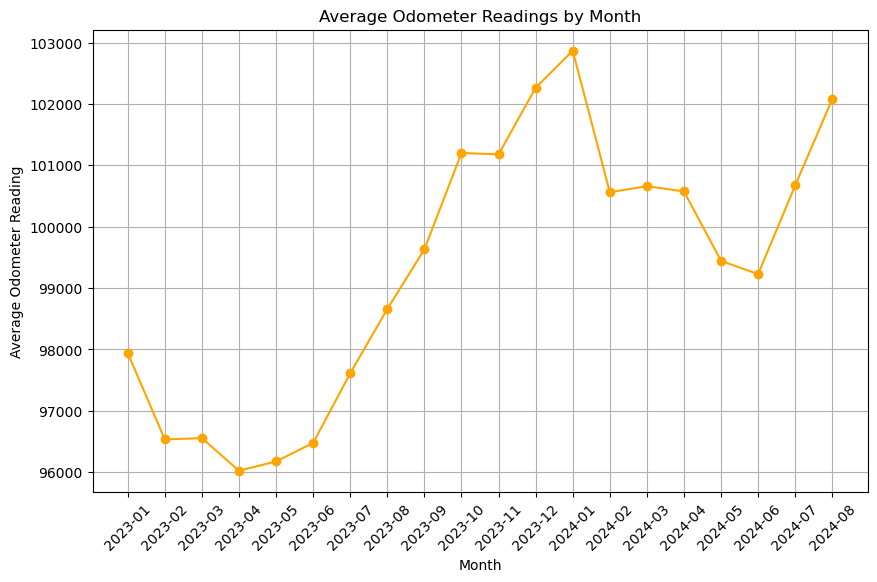

In [54]:
# Plot average odometer readings over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends["test_month"].astype(str), monthly_trends["avg_odometer"], marker="o", color="orange")
plt.title("Average Odometer Readings by Month")
plt.xlabel("Month")
plt.ylabel("Average Odometer Reading")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Analysis of Monthly Trends:
Record Count (First Plot):
There is a significant increase in the record count in March 2023 and June 2024.
The record count dips sharply in late 2023 (October–December) but recovers in early 2024.
This pattern could indicate seasonal effects, reporting cycles, or data collection anomalies.

Average Odometer Readings (Second Plot):
The average odometer readings remain fairly consistent but show an upward trend from mid-2023, peaking around September.
A notable dip is observed in late 2023, followed by a recovery in early 2024.
This could correlate with seasonal variations or changes in the types of vehicles tested or recorded.


### Explore Relationships Between Variables

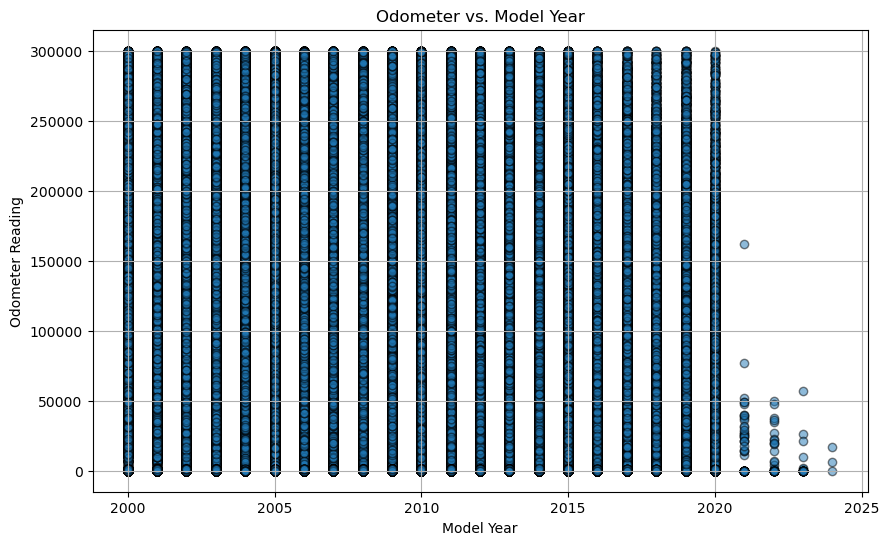

In [55]:
# Scatter plot of odometer vs. model year
plt.figure(figsize=(10, 6))
plt.scatter(odometer_data["my"], odometer_data["odometer"], alpha=0.5, edgecolor="k")
plt.title("Odometer vs. Model Year")
plt.xlabel("Model Year")
plt.ylabel("Odometer Reading")
plt.grid(True)
plt.show()


Expected Pattern:

Older vehicles (earlier model years) generally have higher odometer readings, as they are likely to have been driven longer.
Notable Observations:

Vehicles from the most recent years (2020 and later) have lower odometer readings, as expected.
A few points deviate significantly from the general trend, especially older vehicles with unusually low odometer readings or newer vehicles with higher readings. These could be anomalies or special cases.


In [56]:
# Correlation Analysis

# Calculate correlation between odometer and model year
correlation = odometer_data["odometer"].corr(odometer_data["my"])
print(f"Correlation between Odometer and Model Year: {correlation:.2f}")


Correlation between Odometer and Model Year: -0.53


The correlation between odometer and my (model year) is -0.53, indicating a moderate negative relationship:

### Analyze Insights by Make or Model

In [57]:
# Top 10 vehicle makes by frequency
top_makes = odometer_data["make"].value_counts().head(10)
print(top_makes)


make
CHEV    505424
TOYT    498199
FORD    448973
HOND    432030
NISS    285078
JEEP    203394
HYUN    177147
DODG    136566
GMC     108543
LEXS    103722
Name: count, dtype: int64


In [58]:
# Calculate average odometer for top makes
avg_odometer_by_make = (
    odometer_data.groupby("make")["odometer"].mean().loc[top_makes.index]
)

print(avg_odometer_by_make)


make
CHEV    102749.205481
TOYT    111789.667211
FORD    102346.926036
HOND    104908.253383
NISS     98483.545837
JEEP     91059.947196
HYUN     91742.803480
DODG    110171.835069
GMC     110069.595810
LEXS    100943.510547
Name: odometer, dtype: float64


Toyota and GMC have higher average odometer readings, indicating their vehicles might be preferred for longer usage or higher mileage.
Hyundai and Jeep have relatively lower odometer readings, possibly due to younger vehicles or different usage patterns.

### Visualize Average Odometer by Make

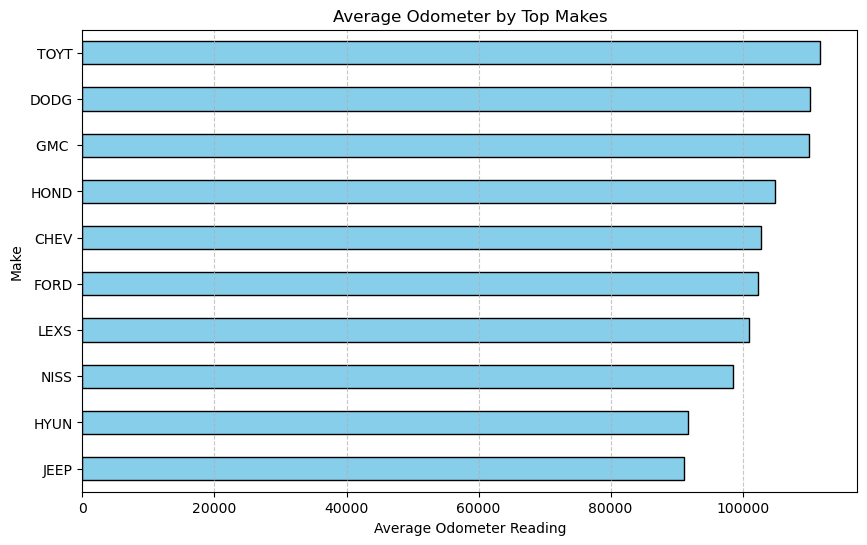

In [59]:
import matplotlib.pyplot as plt

# Bar chart for average odometer by make
plt.figure(figsize=(10, 6))
avg_odometer_by_make.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Average Odometer by Top Makes")
plt.xlabel("Average Odometer Reading")
plt.ylabel("Make")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### Analyze Top Models Under a Specific Make

In [61]:
# Filter data for Toyota
toyota_data = odometer_data[odometer_data["make"] == "TOYT"]

# Top 5 Toyota models by frequency
top_toyota_models = toyota_data["model"].value_counts().head(5)

# Calculate average odometer for these top models
avg_odometer_toyota_models = (
    toyota_data.groupby("model")["odometer"].mean().loc[top_toyota_models.index]
)

print("Top Toyota Models by Frequency:")
print(top_toyota_models)

print("\nAverage Odometer for Top Toyota Models:")
print(avg_odometer_toyota_models)


Top Toyota Models by Frequency:
model
Camry         102102
Corolla        77271
RAV4           71333
Sienna         43742
Highlander     42197
Name: count, dtype: int64

Average Odometer for Top Toyota Models:
model
Camry         115926.140614
Corolla       109808.142770
RAV4           89155.762410
Sienna        129315.932056
Highlander    103783.325829
Name: odometer, dtype: float64


### Analysis of Top Toyota Models:
Most Frequent Models:

Camry is the most common Toyota model with over 102,000 records, followed by the Corolla and RAV4.
Sienna and Highlander have fewer records but still rank among the top 5.
Average Odometer Readings:

Sienna has the highest average odometer reading (129,315), which could indicate it is commonly used for long-distance or heavy usage (e.g., as a family or commercial vehicle).
Camry and Corolla also have high average readings, reflecting their reputation as durable, frequently driven vehicles.
RAV4, a compact SUV, has the lowest average odometer reading (89,155), suggesting lighter or newer usage compared to the others.


### Visualizing those trends


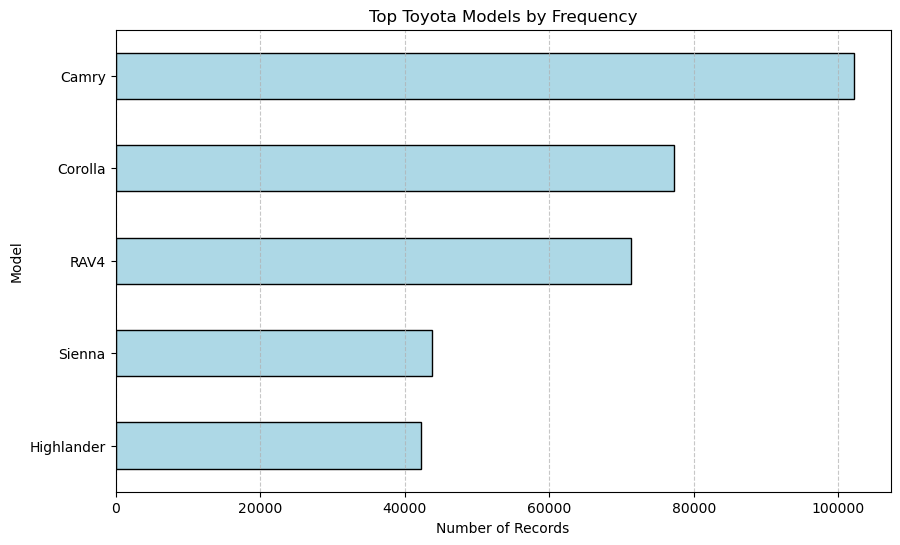

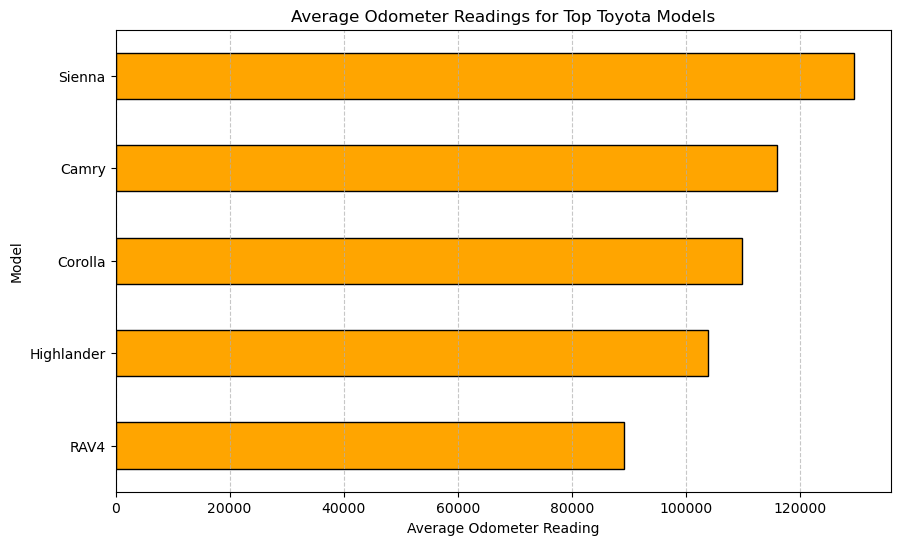

In [62]:
import matplotlib.pyplot as plt

# Bar chart for frequencies of top Toyota models
plt.figure(figsize=(10, 6))
top_toyota_models.sort_values().plot(kind="barh", color="lightblue", edgecolor="black")
plt.title("Top Toyota Models by Frequency")
plt.xlabel("Number of Records")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Bar chart for average odometer of top Toyota models
plt.figure(figsize=(10, 6))
avg_odometer_toyota_models.sort_values().plot(kind="barh", color="orange", edgecolor="black")
plt.title("Average Odometer Readings for Top Toyota Models")
plt.xlabel("Average Odometer Reading")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### Explore Time Trends for Toyota Models

In [63]:
# Add a 'test_year' column for grouping by year
odometer_data["test_year"] = odometer_data["test date"].dt.year

# Filter data for Toyota's top 5 models
toyota_top_models = odometer_data[
    (odometer_data["make"] == "TOYT") & (odometer_data["model"].isin(top_toyota_models.index))
]

# Group by year and model to calculate average odometer readings and frequency
time_trends = toyota_top_models.groupby(["test_year", "model"]).agg(
    avg_odometer=("odometer", "mean"),
    record_count=("vin", "count")
).reset_index()

time_trends.head()


,test_year,model,avg_odometer,record_count
0,2023,Camry,115740.090747,61710
1,2023,Corolla,110405.663756,44670
2,2023,Highlander,100474.070873,25454
3,2023,RAV4,87992.995078,42256
4,2023,Sienna,124172.149461,25960


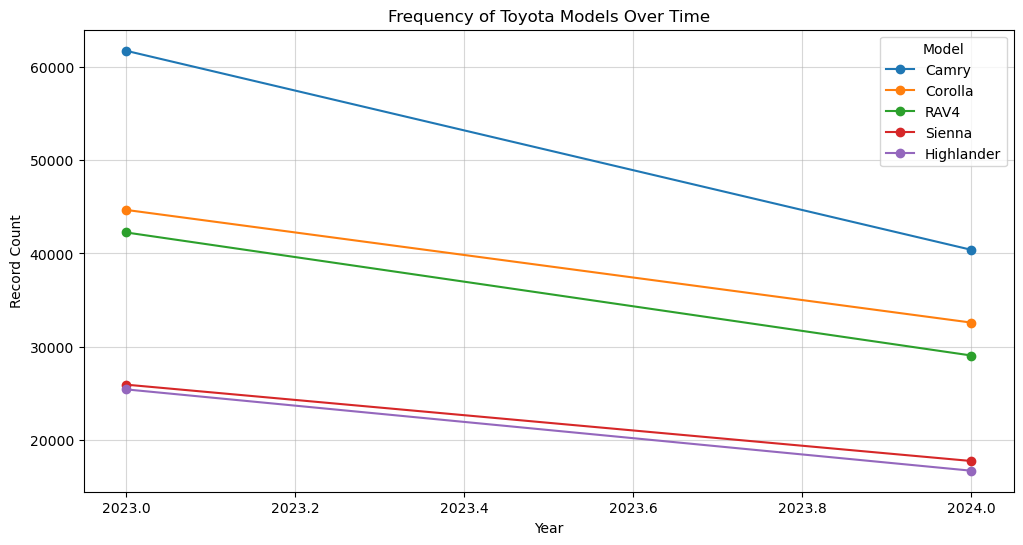

In [64]:
# Plot frequency trends for each model
plt.figure(figsize=(12, 6))
for model in top_toyota_models.index:
    subset = time_trends[time_trends["model"] == model]
    plt.plot(subset["test_year"], subset["record_count"], marker="o", label=model)

plt.title("Frequency of Toyota Models Over Time")
plt.xlabel("Year")
plt.ylabel("Record Count")
plt.legend(title="Model")
plt.grid(alpha=0.5)
plt.show()


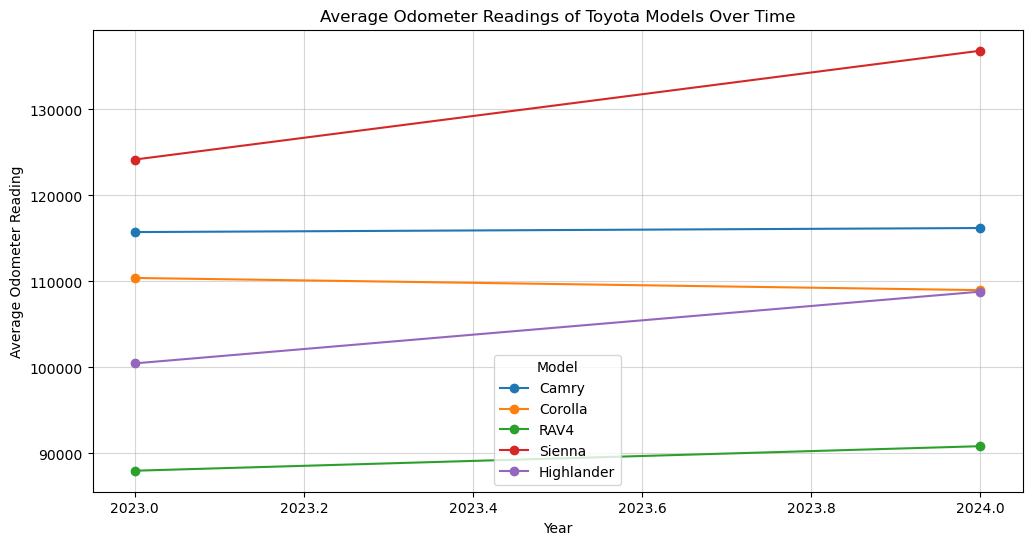

In [65]:
# Plot odometer trends for each model
plt.figure(figsize=(12, 6))
for model in top_toyota_models.index:
    subset = time_trends[time_trends["model"] == model]
    plt.plot(subset["test_year"], subset["avg_odometer"], marker="o", label=model)

plt.title("Average Odometer Readings of Toyota Models Over Time")
plt.xlabel("Year")
plt.ylabel("Average Odometer Reading")
plt.legend(title="Model")
plt.grid(alpha=0.5)
plt.show()


 Analysis of Toyota Time Trends:
1. Frequency of Toyota Models Over Time (First Plot):
Decline in Records: The frequency of records for all top Toyota models decreases from 2023 to 2024. This could indicate:

Fewer vehicles being tested or recorded in the later months.
Data collection changes or seasonal effects.
Camry Leads: The Camry consistently has the highest frequency, followed by the Corolla and RAV4.

2. Average Odometer Readings Over Time (Second Plot):
Sienna Shows the Steepest Increase: The average odometer readings for the Sienna grow significantly, indicating older models are being recorded more frequently or driven heavily.
Highlander Trends Upward: The Highlander also shows a slight increase, suggesting a similar pattern of use or aging.
Camry and Corolla: These models have steady odometer readings over time, reflecting consistent usage patterns.
RAV4 Lags: The RAV4 has the lowest average odometer readings and grows marginally, likely due to a younger fleet.

## Summary and Conclusions

## Key Findings
Top Makes and Models
Chevrolet (CHEV), Toyota (TOYT), and Ford (FORD) are the most frequent vehicle makes, with Toyota having notable dominance in the top models.
The most common Toyota models are Camry, Corolla, and RAV4, with the Sienna showing the highest average odometer readings.
### Odometer Trends
Negative Correlation with Model Year:
Odometer readings are moderately negatively correlated with model year (-0.53), as newer vehicles typically have lower mileage.
Outliers and High Readings:
Certain older vehicles (e.g., Toyota Sienna) show exceptionally high odometer readings, indicating heavy usage or potential anomalies.
### Time Trends
Declining Record Frequency:
A decrease in record counts across all top Toyota models was observed from 2023 to 2024. This could suggest seasonal effects, data collection differences, or changing trends in vehicle use.
Increasing Odometer Readings:
For models like the Sienna and Highlander, average odometer readings increased significantly, highlighting their consistent or intensive usage over time.


### Insights by Manufacturer
Toyota:
Popular models like the Camry and Corolla have steady average odometer readings, reflecting consistent usage patterns.
The Sienna stands out for its high odometer readings, likely due to its use as a family or commercial vehicle.
General Patterns:
SUVs (e.g., RAV4) tend to have lower odometer readings compared to sedans or vans, which may point to newer fleets or lighter use.

### Business Implications
Vehicle Durability:
Toyota models, especially the Sienna, exhibit high durability based on odometer readings, making them ideal for buyers looking for long-term reliability.


Resale and Fleet Use:
Models with lower odometer readings (e.g., RAV4) could be marketed for resale or fleet use, as they likely have longer lifespans.


Seasonal/Operational Factors:
Declining records may signal operational or data issues that need investigation to ensure consistent reporting.

### Recommendations

Further Analysis:
Conduct similar trend analysis for other top makes (e.g., Chevrolet, Ford) to draw comparative insights.
Investigate the cause of declining records over time and address any inconsistencies in data collection.

Targeted Marketing:
Focus on promoting models with high reliability (e.g., Sienna) to specific customer segments, such as families or commercial users.

Operational Insights:
Use odometer and model year correlations to inform maintenance schedules or lifecycle predictions for fleet management.